<a href="https://colab.research.google.com/github/Karthik2830/Karthik2830/blob/main/3_implementation%20of%20single%20dense%20layer%20using%20digit%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0


In [4]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))


In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
750/750 [==============================] - 4s 5ms/step - loss: 0.3254 - accuracy: 0.9089 - val_loss: 0.1863 - val_accuracy: 0.9483
Epoch 2/5
750/750 [==============================] - 4s 6ms/step - loss: 0.1533 - accuracy: 0.9556 - val_loss: 0.1435 - val_accuracy: 0.9582
Epoch 3/5
750/750 [==============================] - 4s 5ms/step - loss: 0.1094 - accuracy: 0.9682 - val_loss: 0.1147 - val_accuracy: 0.9653
Epoch 4/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0817 - accuracy: 0.9764 - val_loss: 0.0972 - val_accuracy: 0.9718
Epoch 5/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0639 - accuracy: 0.9818 - val_loss: 0.1008 - val_accuracy: 0.9706


In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nTest Accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.0889 - accuracy: 0.9712

Test Accuracy: 97.12%


In [11]:
import matplotlib.pyplot as plt


In [13]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0514 - accuracy: 0.9850 - val_loss: 0.0962 - val_accuracy: 0.9720
Epoch 2/5
750/750 [==============================] - 3s 5ms/step - loss: 0.0406 - accuracy: 0.9881 - val_loss: 0.0877 - val_accuracy: 0.9743
Epoch 3/5
750/750 [==============================] - 3s 5ms/step - loss: 0.0331 - accuracy: 0.9909 - val_loss: 0.0857 - val_accuracy: 0.9762
Epoch 4/5
750/750 [==============================] - 7s 9ms/step - loss: 0.0275 - accuracy: 0.9922 - val_loss: 0.0876 - val_accuracy: 0.9735
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0223 - accuracy: 0.9940 - val_loss: 0.0863 - val_accuracy: 0.9763


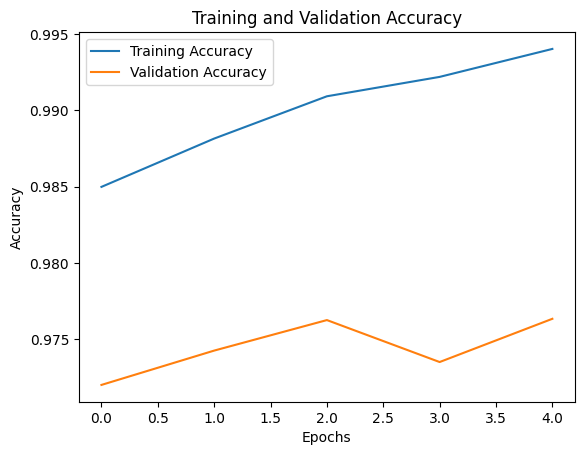

In [14]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

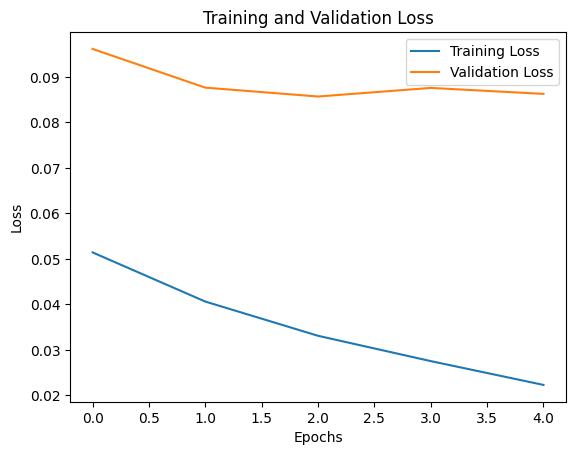

In [15]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()